# Business Understanding

Tujuan: Memprediksi Status Loan

Permasalahan: Perusahaan Loan ingin mengetahui status loan dari pengguna berdasarkan faktor-faktor yang ada

Kebutuhan: Data Loan Pengguna

Batasan Analisis: -

Batas Minimum: >70

## Import Libarary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from numpy import where
from matplotlib import pyplot
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Data Understanding

In [ ]:
df = pd.read_csv('/content/Loan_Default.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
pd.set_option("display.max_columns", df.shape[-1])
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [ ]:
cat_df = df.drop(num_df, axis = 1)
cat_df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


<ipython-input-108-a7a8c0cecddb>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=num_df[attr], ax=axes[row, col], fill=True)


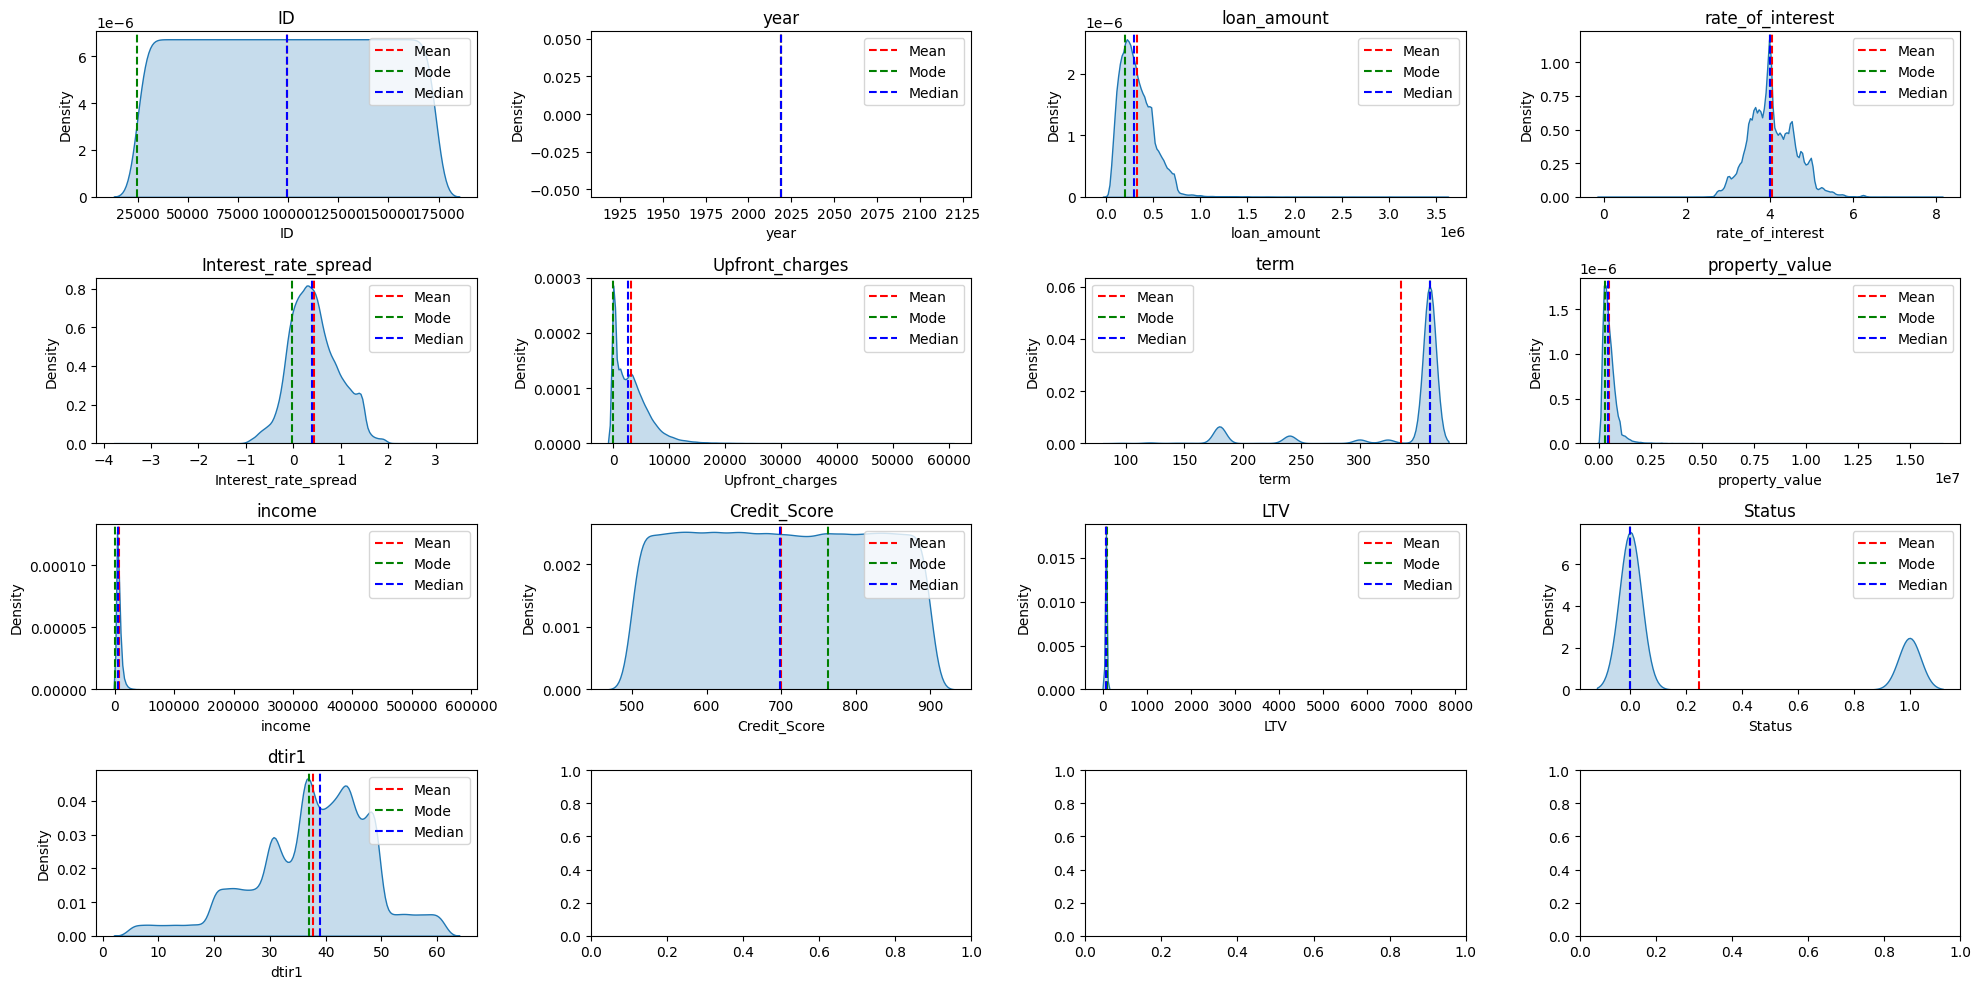

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10))

for i, attr in enumerate(num_df):
    row = i // 4
    col = i % 4
    sns.kdeplot(data=num_df[attr], ax=axes[row, col], fill=True)
    axes[row, col].set_title(attr)

    mean_val = num_df[attr].mean()
    mode_val = num_df[attr].mode().iloc[0]
    median_val = num_df[attr].median()

    axes[row, col].axvline(mean_val, color='r', linestyle='--', label='Mean')
    axes[row, col].axvline(mode_val, color='g', linestyle='--', label='Mode')
    axes[row, col].axvline(median_val, color='b', linestyle='--', label='Median')

    axes[row, col].legend()

plt.tight_layout()

plt.show()

Berikut merupakan distribusi data numerikal, berdasarkan hasil visualisasi data fitur ID dan Credit_Score memiliki distribusi data normal. Fitur Status dan dtir memiliki distribusi data bimodal, dan fitur lainnya cenderung memiliki distribusi data skewed

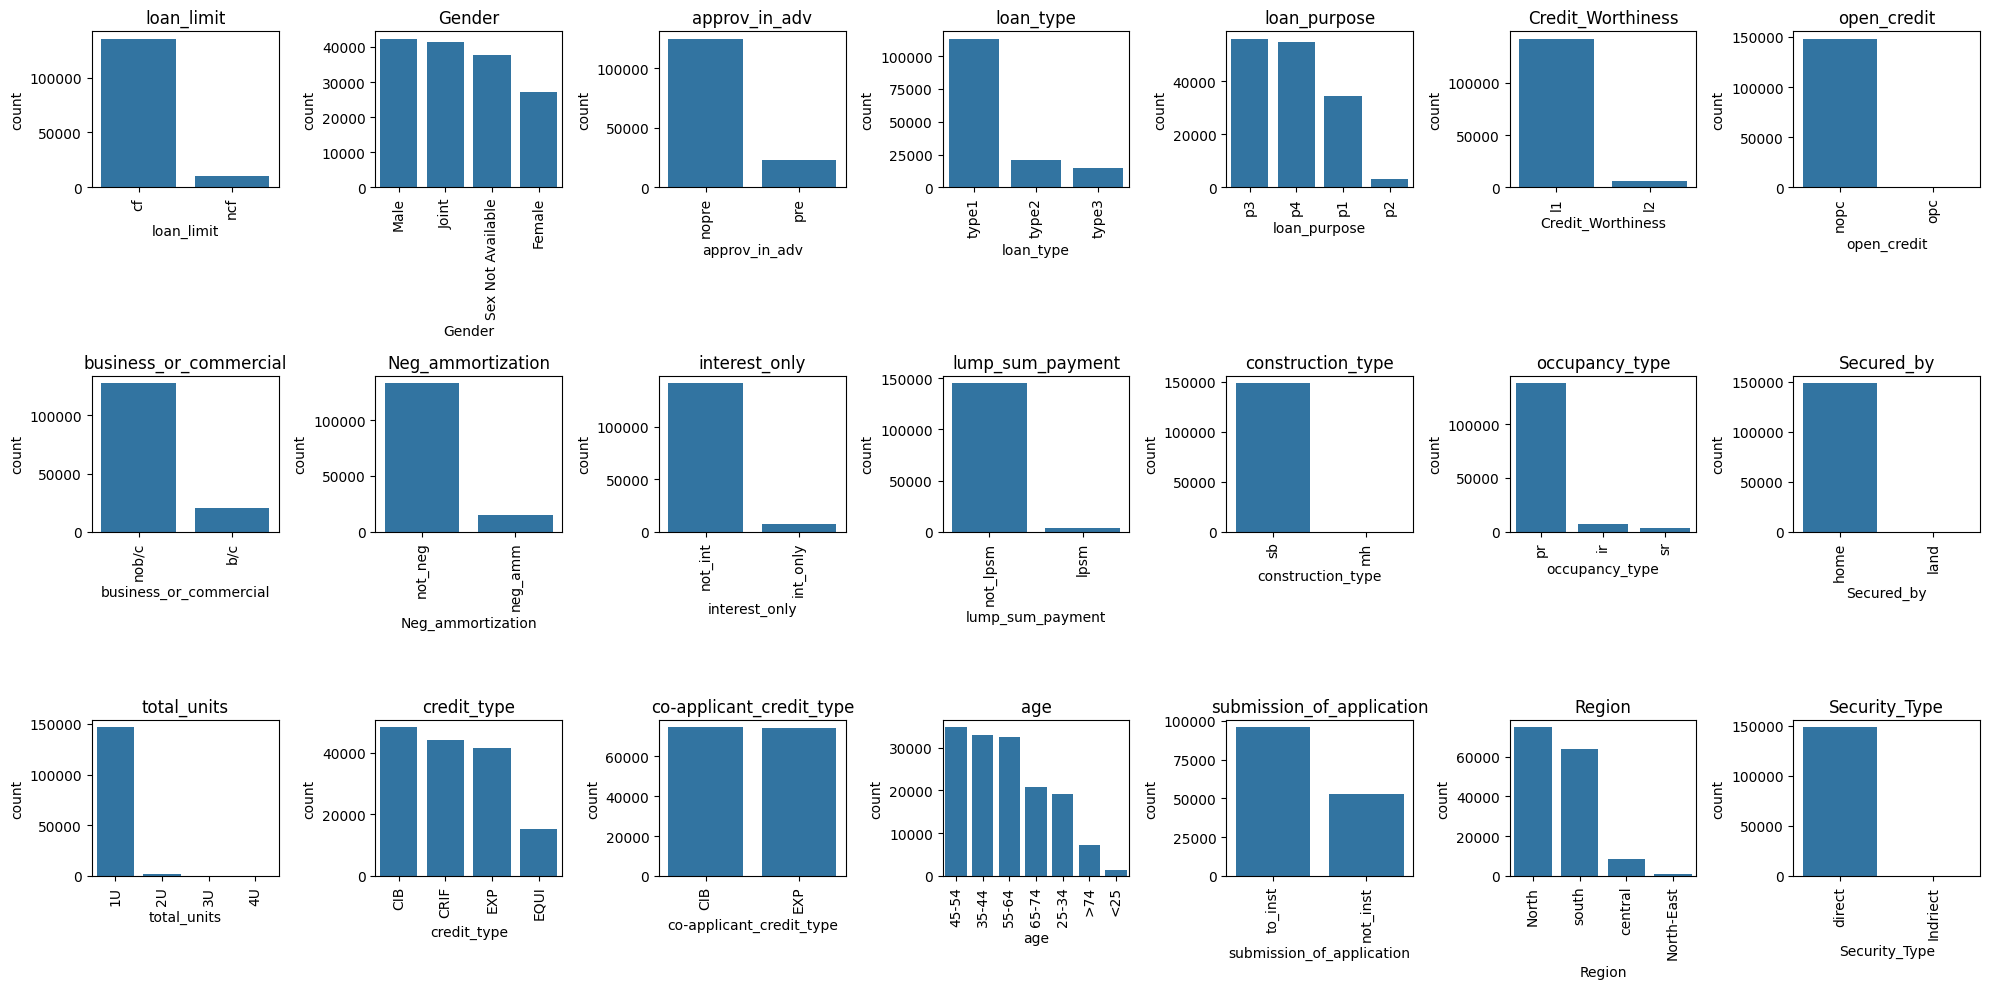

In [ ]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cat_df.columns):
    plt.subplot(3, 7, i+1)
    top_10_values = cat_df[column].value_counts().head(10)
    sns.countplot(data=cat_df, x=column, order=top_10_values.index)
    plt.title(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

Berikut merupakan visualisasi dari distribusi data kategorikal, rata rata data kategorikal memiliki distribusi data skewed.

Hanya fitur co-applicant-credit-type yang memiliki distribusi data normal

# Data Preparation

### Mengubah nama kolom agar memiliki penulisan yang sama

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
col_ren = {'Gender': 'gender', 'Credit_Worthiness': 'credit_worthiness', 'Upfront_charges': 'upfront_charges',
           'Neg_ammortization': 'neg_ammortization', 'Secured_by': 'secured_by','Security_Type': 'security_type','Status': 'status',
           'Interest_rate_spread': 'interest_rate_spread', 'Credit_Score': 'credit_score', 'Region': 'region'}

df = df.rename(columns=col_ren)
df.columns

Index(['ID', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

### Check Duplikasi Data

In [ ]:
df.duplicated().sum()

0

### Check Value

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,ID,int64,0,0.00,148670,"[24890, 24891, 24892, 24893, 24894, 24895, 248..."
1,year,int64,0,0.00,1,[2019]
2,loan_limit,object,3344,2.25,2,"[cf, nan, ncf]"
3,gender,object,0,0.00,4,"[Sex Not Available, Male, Joint, Female]"
4,approv_in_adv,object,908,0.61,2,"[nopre, pre, nan]"
5,loan_type,object,0,0.00,3,"[type1, type2, type3]"
6,loan_purpose,object,134,0.09,4,"[p1, p4, p3, p2, nan]"
7,credit_worthiness,object,0,0.00,2,"[l1, l2]"
8,open_credit,object,0,0.00,2,"[nopc, opc]"
9,business_or_commercial,object,0,0.00,2,"[nob/c, b/c]"


### Cleaning Data Null

Untuk data yang memiliki nilai null dengan jumlah banyak, dilakukan imputasi

In [ ]:
#Median Imputation

rate_of_interest_med = df['rate_of_interest'].median()
interest_rate_spread_med = df['interest_rate_spread'].median()
upfront_charges_med = df['upfront_charges'].median()
term_med = df['term'].median()
property_value_med = df['property_value'].median()
income_med = df['income'].median()
LTV_med = df['LTV'].median()
dtir1_med = df['dtir1'].median()

df['rate_of_interest'].fillna(rate_of_interest_med, inplace=True)
df['interest_rate_spread'].fillna(interest_rate_spread_med, inplace=True)
df['upfront_charges'].fillna(upfront_charges_med, inplace=True)
df['term'].fillna(term_med, inplace=True)
df['property_value'].fillna(property_value_med, inplace=True)
df['income'].fillna(income_med, inplace=True)
df['LTV'].fillna(LTV_med, inplace=True)
df['dtir1'].fillna(dtir1_med, inplace=True)

#Mode Imputation
loanlimit_mode = df['loan_limit'].mode()[0]
approvinadv_mode = df['approv_in_adv'].mode()[0]
loanpurpose_mode = df['loan_purpose'].mode()[0]
neg_ammortization_mode = df['neg_ammortization'].mode()[0]
age_mode = df['age'].mode()[0]
submission_of_application_mode = df['submission_of_application'].mode()[0]

df['loan_limit'].fillna(loanlimit_mode, inplace=True)
df['approv_in_adv'].fillna(approvinadv_mode, inplace=True)
df['loan_purpose'].fillna(loanpurpose_mode, inplace=True)
df['neg_ammortization'].fillna(neg_ammortization_mode, inplace=True)
df['age'].fillna(age_mode, inplace=True)
df['submission_of_application'].fillna(submission_of_application_mode, inplace=True)

Untuk data yang memiliki nilai null dengan jumlah sedikit, dilakukan penghapusan data null

In [ ]:
df = df.dropna()

### Outlier Handling

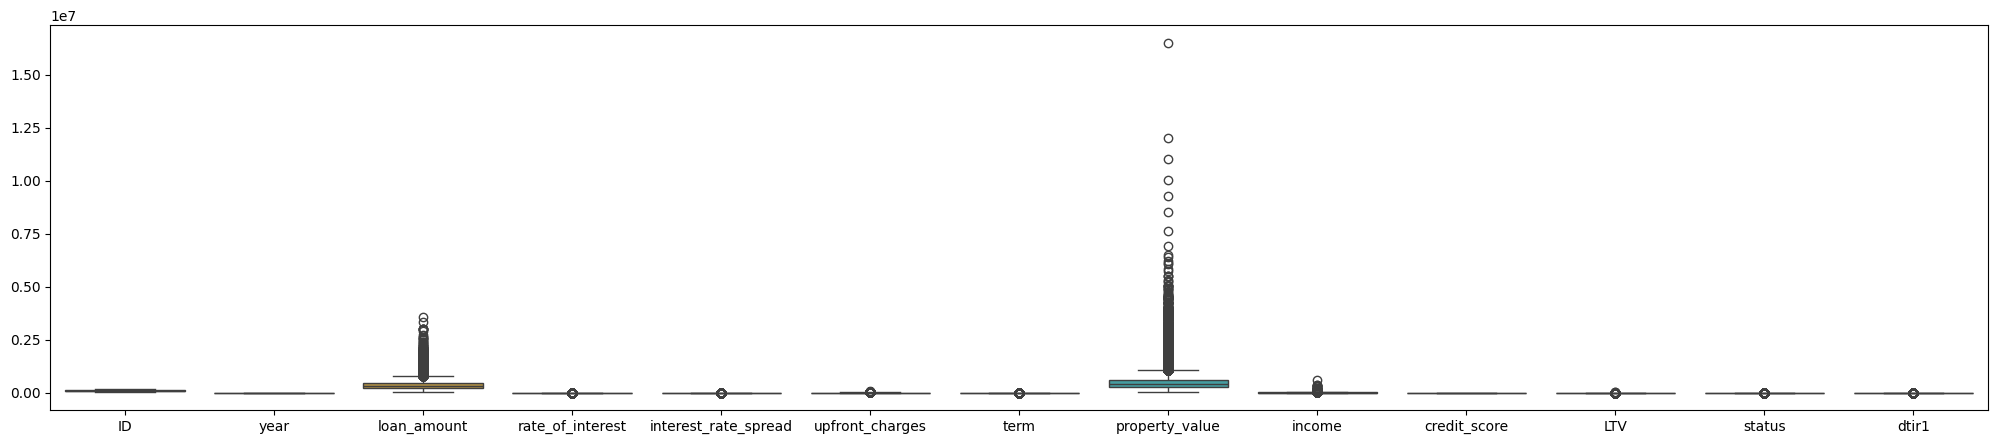

In [ ]:
plt.figure(figsize=(25, 5))
sns.boxplot(df)
plt.show()

Berikut merupakan hasil visualisasi dari boxplot yang menunjukkan outlier atau pecilan pada fitur-fitur numerik. Berdasarkan hasil visualisasi pecilan atau outlier terdeteksi pada fitur 'loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'property_value', 'income', 'LTV', 'status', dan 'dtir1'.

In [ ]:
def detect_and_remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = (df[feature] >= lower_bound) & (df[feature] <= upper_bound)

        df = df[data]

    return df

df = df.pipe(detect_and_remove_outliers, features=['loan_amount', 'rate_of_interest', 'interest_rate_spread',
                                                   'upfront_charges', 'term', 'property_value', 'income', 'LTV', 'status', 'dtir1'])

In [ ]:
df.shape

(80300, 34)

### Correlation Matrix Numerical Data Ke Fitur Target

In [ ]:
corr_matrix = df.corr()
corr_matrix['status'].sort_values(ascending = False)

<ipython-input-120-284ef0f191f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


status                  1.000000
dtir1                   0.062372
LTV                     0.044552
interest_rate_spread    0.044108
upfront_charges         0.030413
ID                      0.006862
credit_score            0.002864
rate_of_interest       -0.085935
loan_amount            -0.096443
income                 -0.124742
property_value         -0.131971
year                         NaN
term                         NaN
Name: status, dtype: float64

drop data yang memiliki korelasi NaN

In [ ]:
df.drop(['year', 'term'], axis=1, inplace=True)

<ipython-input-122-f9d8fd64204f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


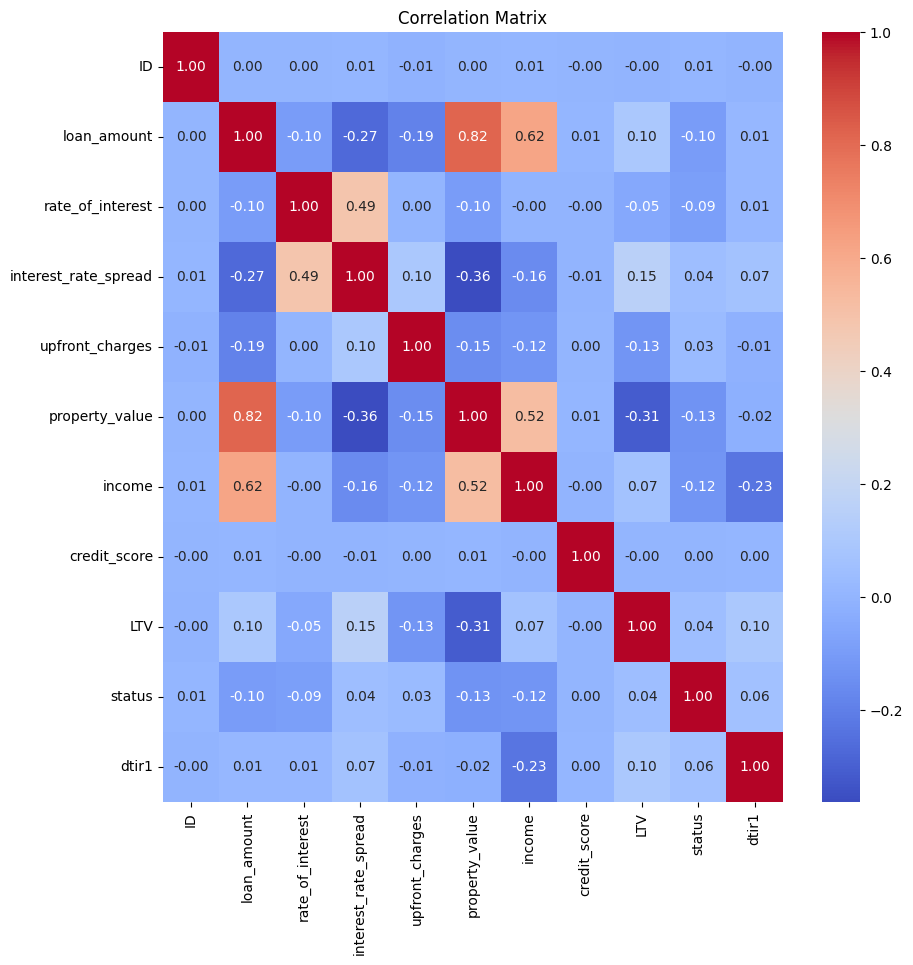

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Berikut merupakan visualisasi untuk melihat bagaimana korelasi linear antar fitur. Berdasarkan hasil visualisasi fitur dtir1 merupakan fitur memiliki nilai korelasi paling tinggi dengan fitur terget, yaitu 0,07 jika dibandingkan dengan fitur lainnya.

In [ ]:
df.shape

(80300, 32)

In [ ]:
#PS: Kalo gayakin apa aja yang mao di hapus, pake aja dulu semuanya, ntar di reduce di rfe

**JAWABAN PERTANYAAN**

Berdasarkan hasil correlation matriks, fitur yang paling mempengaruhi target (status) adalah fitur dtir1

### Encoding categorical data


binary features = ['security_type', 'submission_of_application' 'co-applicant_credit_type', 'secured_by', 'lump_sum_payment', 'interest_only', 'neg_ammortization', 'construction_type', 'business_or_commercial' 'open_credit', 'credit_worthiness', 'approv_in_adv', 'loan_limit', 'status']

In [ ]:
le = LabelEncoder()
binary_feat = ['security_type', 'submission_of_application', 'co-applicant_credit_type', 'secured_by', 'lump_sum_payment',
               'interest_only', 'neg_ammortization', 'construction_type', 'business_or_commercial',
               'open_credit', 'credit_worthiness', 'approv_in_adv', 'loan_limit']
for col in binary_feat:
    df[col] = le.fit_transform(df[col])

df

,ID,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,LTV,region,security_type,status,dtir1
0,24890,0,Sex Not Available,0,type1,p1,0,0,1,116500,3.990,0.3904,2596.45,1,1,1,118000.0,1,pr,0,1U,1740.0,EXP,758,0,25-34,1,98.728814,south,1,1,45.0
1,24891,0,Male,0,type2,p1,0,0,0,206500,3.990,0.3904,2596.45,1,1,0,418000.0,1,pr,0,1U,4980.0,EQUI,552,1,55-64,1,75.135870,North,1,1,39.0
2,24892,0,Male,1,type1,p1,0,0,1,406500,4.560,0.2000,595.00,0,1,1,508000.0,1,pr,0,1U,9480.0,EXP,834,0,35-44,1,80.019685,south,1,0,46.0
3,24893,0,Male,0,type1,p4,0,0,1,456500,4.250,0.6810,2596.45,1,1,1,658000.0,1,pr,0,1U,11880.0,EXP,587,0,45-54,0,69.376900,North,1,0,42.0
4,24894,0,Joint,1,type1,p1,0,0,1,696500,4.000,0.3042,0.00,1,1,1,758000.0,1,pr,0,1U,10440.0,CRIF,602,1,25-34,0,91.886544,North,1,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148658,173548,0,Sex Not Available,0,type1,p4,0,0,1,386500,3.990,0.3904,2596.45,1,0,1,418000.0,1,pr,0,1U,4680.0,EQUI,669,1,25-34,1,75.135870,south,1,1,39.0
148659,173549,0,Sex Not Available,0,type3,p3,0,0,1,416500,4.375,0.0230,5687.91,0,1,1,608000.0,1,pr,0,1U,4080.0,EXP,520,1,65-74,1,68.503289,south,1,0,40.0
148661,173551,0,Sex Not Available,0,type2,p4,0,0,0,346500,3.990,0.3904,2596.45,1,1,1,358000.0,1,pr,0,1U,5760.0,EXP,585,0,25-34,1,96.787710,south,1,1,39.0
148662,173552,0,Joint,0,type1,p4,0,0,1,646500,3.625,0.0743,7639.80,1,0,1,828000.0,1,pr,0,1U,13500.0,CIB,873,1,45-54,0,78.079710,North,1,0,31.0


In [ ]:
one_hot_cat_col = ['gender', 'loan_type', 'loan_purpose', 'occupancy_type', 'total_units', 'credit_type', 'age', 'region']

one_hot_encoded = pd.get_dummies(df[one_hot_cat_col])
one_hot_encoded

,gender_Female,gender_Joint,gender_Male,gender_Sex Not Available,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,region_North,region_North-East,region_central,region_south
0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148658,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
148659,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
148661,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
148662,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df.drop(columns=one_hot_cat_col, inplace=True)
df = pd.concat([df, one_hot_encoded], axis=1, join='inner')
df.head()

,ID,loan_limit,approv_in_adv,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,secured_by,income,...,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,region_North,region_North-East,region_central,region_south
0,24890,0,0,0,0,1,116500,3.99,0.3904,2596.45,1,1,1,118000.0,1,0,1740.0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,24891,0,0,0,0,0,206500,3.99,0.3904,2596.45,1,1,0,418000.0,1,0,4980.0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,24892,0,1,0,0,1,406500,4.56,0.2000,595.00,0,1,1,508000.0,1,0,9480.0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,24893,0,0,0,0,1,456500,4.25,0.6810,2596.45,1,1,1,658000.0,1,0,11880.0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,24894,0,1,0,0,1,696500,4.00,0.3042,0.00,1,1,1,758000.0,1,0,10440.0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.shape

(80300, 57)

# Modelling

### Memisalkan variabel dependen dan independen


In [ ]:
X = df.drop(['status','ID'], axis=1)
y = df['status']

In [ ]:
X

,loan_limit,approv_in_adv,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,secured_by,income,credit_score,...,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,region_North,region_North-East,region_central,region_south
0,0,0,0,0,1,116500,3.990,0.3904,2596.45,1,1,1,118000.0,1,0,1740.0,758,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,206500,3.990,0.3904,2596.45,1,1,0,418000.0,1,0,4980.0,552,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,1,406500,4.560,0.2000,595.00,0,1,1,508000.0,1,0,9480.0,834,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,456500,4.250,0.6810,2596.45,1,1,1,658000.0,1,0,11880.0,587,...,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,696500,4.000,0.3042,0.00,1,1,1,758000.0,1,0,10440.0,602,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148658,0,0,0,0,1,386500,3.990,0.3904,2596.45,1,0,1,418000.0,1,0,4680.0,669,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
148659,0,0,0,0,1,416500,4.375,0.0230,5687.91,0,1,1,608000.0,1,0,4080.0,520,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
148661,0,0,0,0,0,346500,3.990,0.3904,2596.45,1,1,1,358000.0,1,0,5760.0,585,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
148662,0,0,0,0,1,646500,3.625,0.0743,7639.80,1,0,1,828000.0,1,0,13500.0,873,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148658    1
148659    0
148661    1
148662    0
148663    1
Name: status, Length: 80300, dtype: int64

###Detect imbalance data

In [ ]:
from collections import Counter

counter_y = Counter(y)
print(counter_y)

Counter({0: 56779, 1: 23521})


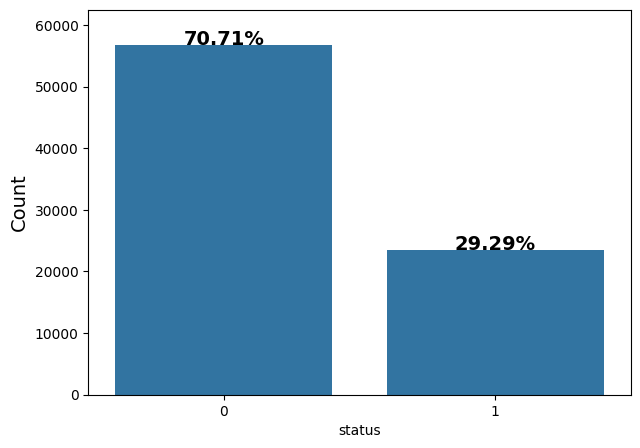

In [ ]:
total = len(df)
plt.figure(figsize=(7,5))
g = sns.countplot(x='status', data=df)
g.set_ylabel('Count', fontsize=14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 1.5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14, fontweight='bold')
plt.margins(y=0.1)
plt.show()

Dilakukan oversampling dengan SMOTE

In [ ]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({1: 56779, 0: 56779})


###Splitting Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Training Model

Disini saya tidak menggunakan SVC karena SVC tidak cocok untuk kumpulan data yang besar

In [ ]:
classifiers = {
    'LogisiticRegression': LogisticRegression(),
    'KNearest': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'NB,': GaussianNB(),
    'GBC': GradientBoostingClassifier(),
    'RF' : RandomForestClassifier(),
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "=", training_score.mean() * 100, "% accuracy score")

LogisticRegression = 70.76120797011208 % accuracy score
KNeighborsClassifier = 85.969800747198 % accuracy score
DecisionTreeClassifier = 99.99844333748443 % accuracy score
GaussianNB = 94.8318804483188 % accuracy score
GradientBoostingClassifier = 99.99533001245331 % accuracy score
RandomForestClassifier = 99.99688667496886 % accuracy score


**Best Model = DecisionTreeClassifier**

*Best model dipilih berdasarkan nilai akurasi tertinggi

*Karena sudah menggunakan crossval jadi hasil tidak mungkin overfit

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9998754669987546

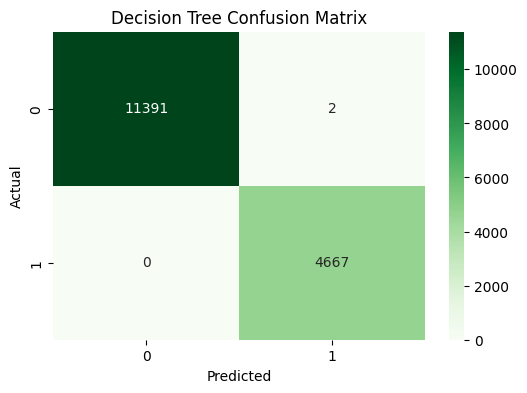

In [ ]:
DT_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11393
           1       1.00      1.00      1.00      4667

    accuracy                           1.00     16060
   macro avg       1.00      1.00      1.00     16060
weighted avg       1.00      1.00      1.00     16060



## Parameter Search

In [ ]:
params = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss']
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Parameter terbaik: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}


In [ ]:
x = grid_search.cv_results_

for mean_score, params in zip(x["mean_test_score"], x["params"]):
    print(np.sqrt(mean_score), params)

0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.9991045181096412 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}
0.9991045181096412 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.9991045181096412 {'criterio

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.999813200498132

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11393
           1       1.00      1.00      1.00      4667

    accuracy                           1.00     16060
   macro avg       1.00      1.00      1.00     16060
weighted avg       1.00      1.00      1.00     16060



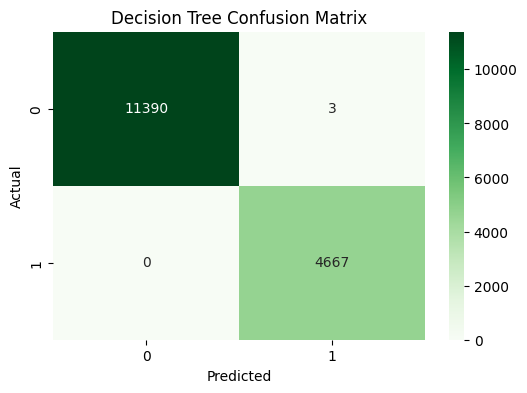

In [ ]:
DT_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature Selection With RFE (OPTIONAL)

In [ ]:
model = DecisionTreeClassifier()

rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [ ]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['interest_rate_spread', 'upfront_charges', 'credit_type_EQUI',
       'credit_type_EXP', 'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64',
       'age_65-74', 'age_<25'],
      dtype='object')


In [ ]:
X_train_features = X_train[X.columns[rfe.support_]]
X_test_features = X_test[X.columns[rfe.support_]]

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train_features, y_train)

print("Parameter terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Parameter terbaik: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}


In [ ]:
x = grid_search.cv_results_

for mean_score, params in zip(x["mean_test_score"], x["params"]):
    print(np.sqrt(mean_score), params)

0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.9205519758406688 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.9982316244688223 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.9999766497896504 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
0.9999766497896504 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.9999766497896504 {'criterio

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test_features)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.999813200498132

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11393
           1       1.00      1.00      1.00      4667

    accuracy                           1.00     16060
   macro avg       1.00      1.00      1.00     16060
weighted avg       1.00      1.00      1.00     16060



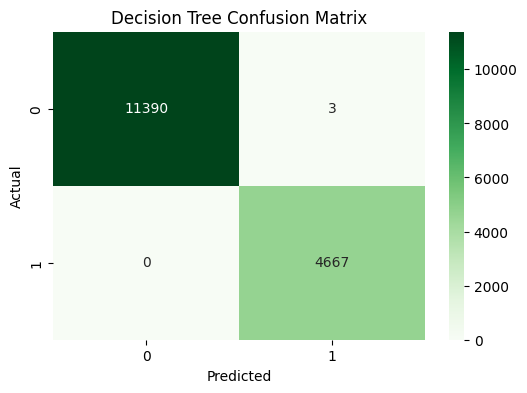

In [ ]:
DT_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hasil dari features selection memiliki hasil akurasi lebih rendah jika dibandingkan dengan model yang menggunakan seluruh feature

Model w/o Feature Selection = 0.9998754669987546

Model w/ Feature Selection = 0.999813200498132

# Hasil

BEST MODEL = Decision Tree

BEST FEATURES =
*   'interest_rate_spread'
*   'upfront_charges'
*   'credit_type_EQUI'
*   'credit_type_EXP'
*   'age_25-34'
*   'age_35-44'
*   'age_45-54'
*   'age_55-64'
*   'age_65-74'
*   'age_<25'

BEST PARAMETER = {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

